In [1]:
import matplotlib
import squarify
import time
import os
import re
import networkx as nx
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
from mpl_toolkits.mplot3d import Axes3D


In [2]:
with open(r'C:\Users\Admin\OneDrive\Máy tính\Projects\fpgrowth\dataset\groceries.csv') as file:
  df = pd.read_csv(file)

In [3]:
# The first five rows of the dataset
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
# Rename the name of the columns
colnames = ['uid', 'date', 'items']
df = df.set_axis(labels=colnames, axis=1)
df.head()

,uid,date,items
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [5]:
transactions_df = pd.DataFrame(data=df[['uid', 'date']], columns=df.columns)
transactions_df['items'] = df['items'].transform(lambda x: [x])
transactions_df = transactions_df.groupby(['uid', 'date']).sum()
print(transactions_df.shape)
transactions_df.head()

(14963, 1)


items
uid  date                                                         
1000 15-03-2015  [sausage, whole milk, semi-finished bread, yog...
     24-06-2014                  [whole milk, pastry, salty snack]
     24-07-2015                     [canned beer, misc. beverages]
     25-11-2015                        [sausage, hygiene articles]
     27-05-2015                         [soda, pickled vegetables]

In [6]:
num_of_customers = len(list(set(df['uid'].values)))
num_of_items = len(list(set(df['items'].values)))
num_of_transactions = transactions_df.shape[0]

In [7]:
# Number of customers, items, and transactions
print(f'Total number of customers: {num_of_customers}')
print(f'Total number of items: {num_of_items}')
print(f'Total number of transactions: {num_of_transactions}')

Total number of customers: 3898
Total number of items: 167
Total number of transactions: 14963


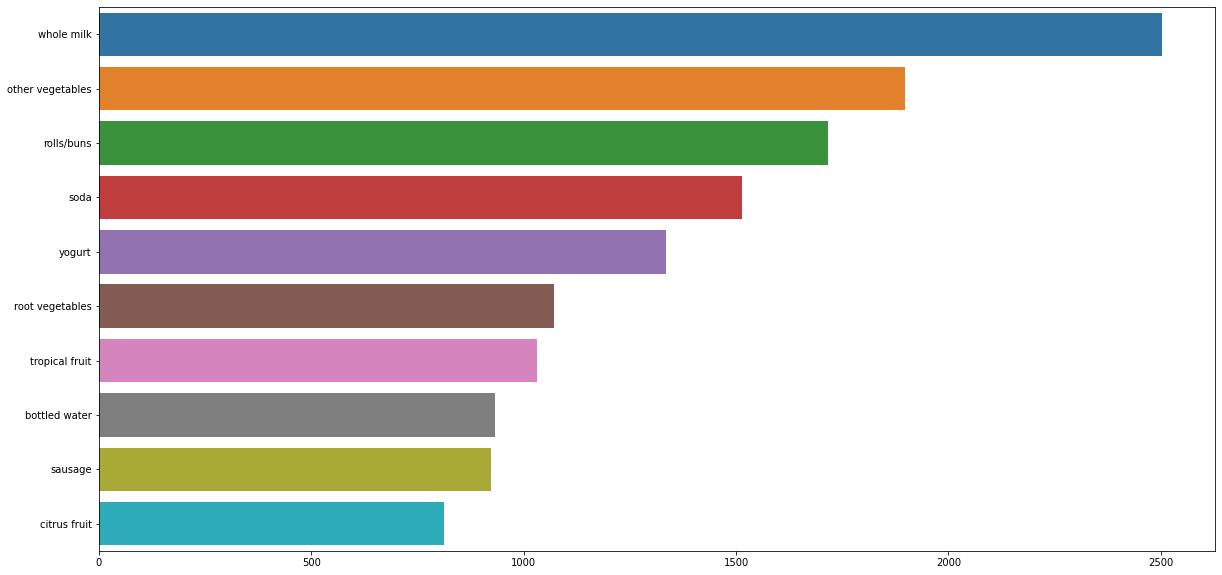

In [8]:
# Top ten best-seller items
top_ten_items = df['items'].value_counts().sort_values(ascending=False)[:10]
plt.figure(figsize=(20, 10))
s = sns.barplot(x=top_ten_items.values, y=top_ten_items.index)

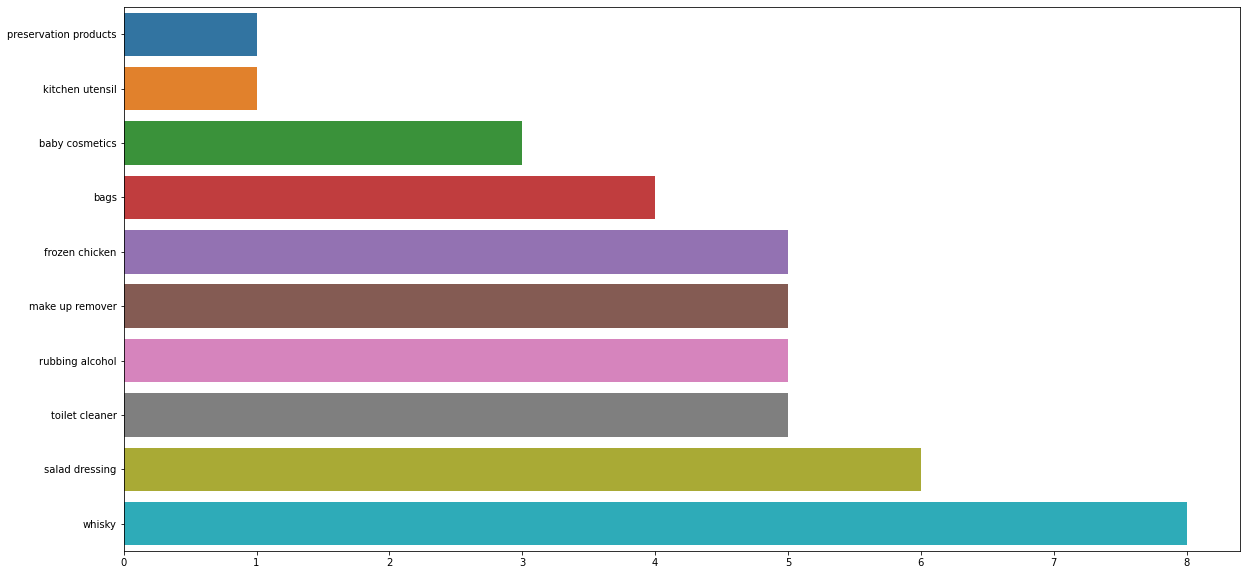

In [9]:
# Bottom ten least sold items
bottom_ten_items = df['items'].value_counts().sort_values(ascending=True)[:10]
plt.figure(figsize=(20, 10))
s = sns.barplot(x=bottom_ten_items.values, y=bottom_ten_items.index)

<AxesSubplot:>

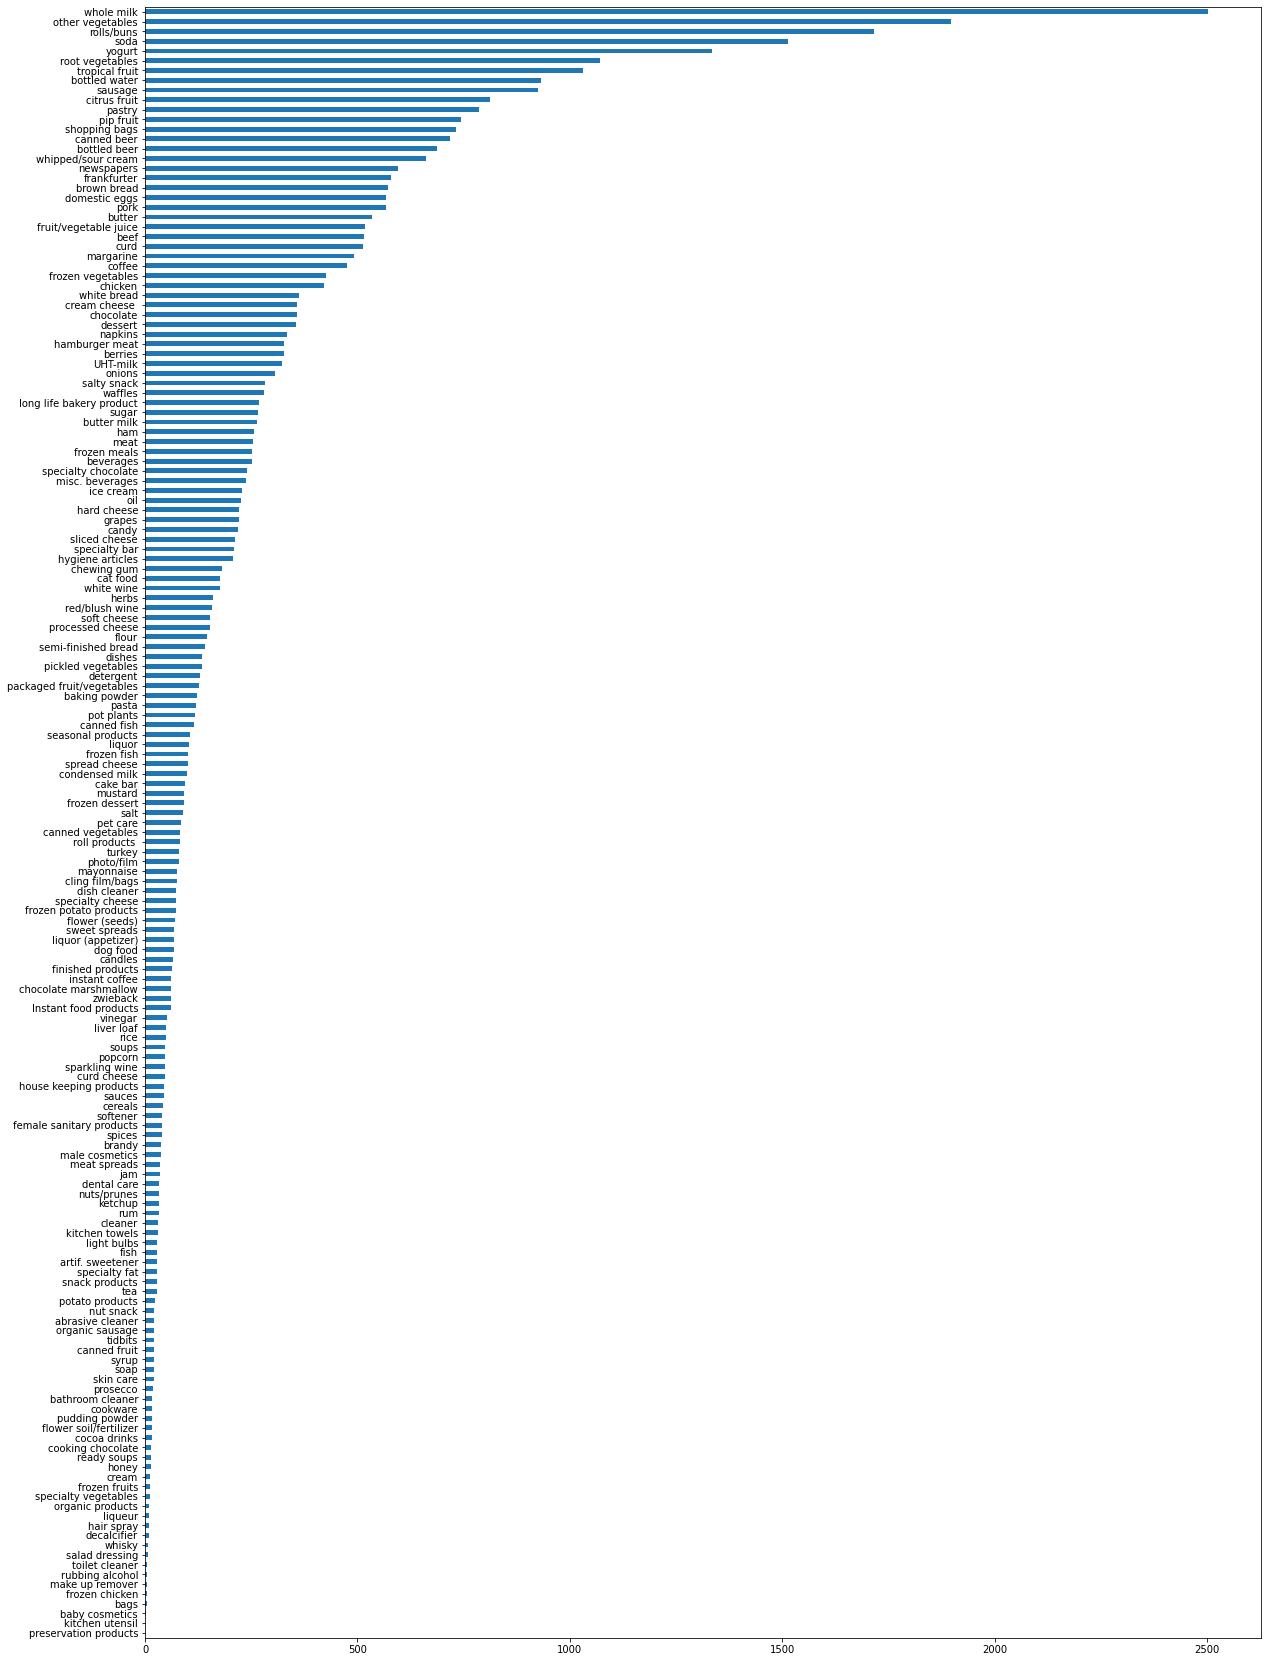

In [10]:
# A objective view of product sales
df['items'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(20, 30))

In [11]:
# Transform the dataset into a spare matrix

transactions = transactions_df['items']
transactions = transactions.droplevel(0)
transactions.head()

enc = TransactionEncoder()
transactions = pd.DataFrame(enc.fit(transactions).transform(transactions), columns=enc.columns_)
transactions.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
# Generate associations rules for each pair of frequent itemsets
frequent_itemsets = fpgrowth(transactions, min_support= 6/len(df), use_colnames=True, max_len = 2)
rules = association_rules(frequent_itemsets, metric="lift",  min_threshold = 1.5)
display(rules.head())
print("Rules identified: ", len(rules))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(semi-finished bread),(salty snack),0.009490,0.018780,0.000334,0.035211,1.874969,0.000156,1.017031
1,(salty snack),(semi-finished bread),0.018780,0.009490,0.000334,0.017794,1.874969,0.000156,1.008454
2,(semi-finished bread),(sliced cheese),0.009490,0.014035,0.000267,0.028169,2.007109,0.000134,1.014544
3,(sliced cheese),(semi-finished bread),0.014035,0.009490,0.000267,0.019048,2.007109,0.000134,1.009743
4,(semi-finished bread),(napkins),0.009490,0.022121,0.000468,0.049296,2.228437,0.000258,1.028584


Rules identified:  768


In [35]:
frequent_itemsets.sort_values(by=['support'], ascending=False).head(20)

,support,itemsets
0,0.157923,(whole milk)
17,0.122101,(other vegetables)
13,0.110005,(rolls/buns)
9,0.097106,(soda)
1,0.085879,(yogurt)
24,0.069572,(root vegetables)
20,0.067767,(tropical fruit)
37,0.060683,(bottled water)
2,0.060349,(sausage)
64,0.053131,(citrus fruit)


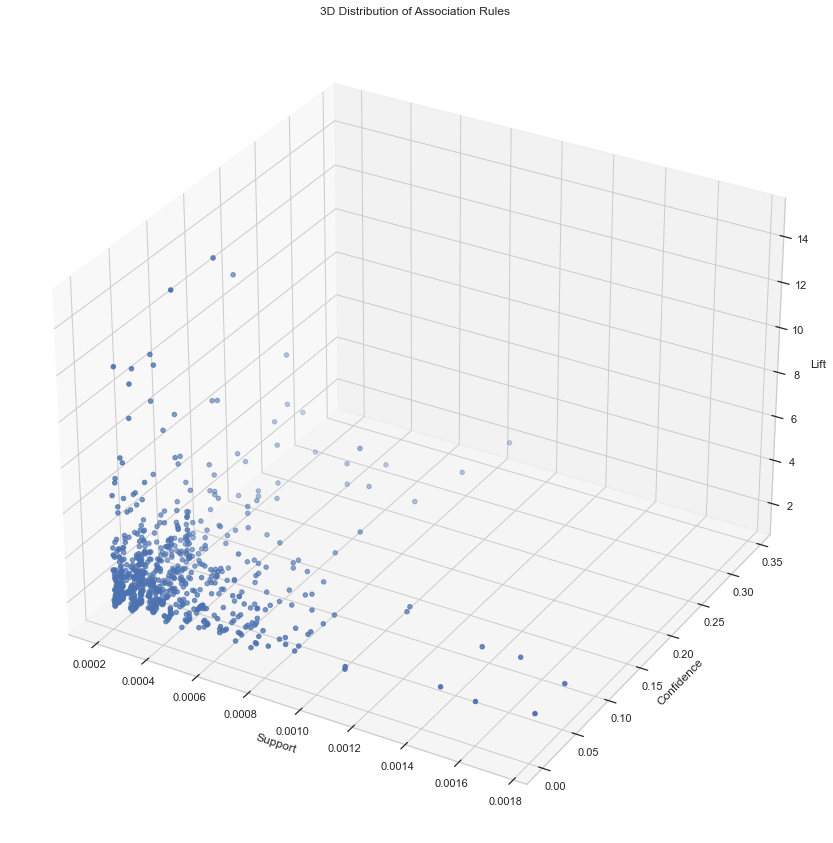

In [13]:
# A 3D scatter plot for rules
sns.set(style='whitegrid')
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')

x = rules['support']
y = rules['confidence']
z = rules['lift']

ax.set_xlabel('Support')
ax.set_ylabel('Confidence')
ax.set_zlabel('Lift')

ax.scatter(x, y, z)
ax.set_title('3D Distribution of Association Rules')

plt.show()

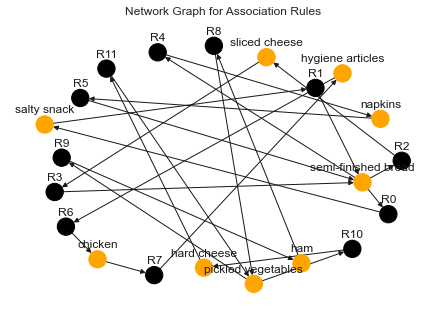

In [14]:
# A network graph for association rules
def draw_network(rules, rules_to_show):
  # Directional Graph from NetworkX
  network = nx.DiGraph()
  
  # Loop through number of rules to show
  for i in range(rules_to_show):
    
    # Add a Rule Node
    network.add_nodes_from(["R"+str(i)])
    for antecedents in rules.iloc[i]['antecedents']: 
        # Add antecedent node and link to rule
        network.add_nodes_from([antecedents])
        network.add_edge(antecedents, "R"+str(i),  weight = 2)
      
    for consequents in rules.iloc[i]['consequents']:
        # Add consequent node and link to rule
        network.add_nodes_from([consequents])
        network.add_edge("R"+str(i), consequents,  weight = 2)

  color_map=[]  
  
  # For every node, if it's a rule, colour as Black, otherwise Orange
  for node in network:
       if re.compile("^[R]\d+$").fullmatch(node) != None:
            color_map.append('black')
       else:
            color_map.append('orange')
  
  # Position nodes using spring layout
  pos = nx.spring_layout(network, k=16, scale=1)
  # Draw the network graph
  nx.draw(network, pos, node_color = color_map, font_size=8)            
  
  # Shift the text position upwards
  for p in pos:  
      pos[p][1] += 0.12

  nx.draw_networkx_labels(network, pos)
  plt.title("Network Graph for Association Rules")
  plt.show()

draw_network(rules, 12)

In [16]:
# Select assocation rules in which "whole milk is the consequent"
rules[rules['consequents'] == {'whole milk'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
98,(softener),(whole milk),0.002740,0.157923,0.000802,0.292683,1.853328,0.000369,1.190523
508,(house keeping products),(whole milk),0.003007,0.157923,0.000735,0.244444,1.547872,0.000260,1.114514
614,(artif. sweetener),(whole milk),0.001938,0.157923,0.000535,0.275862,1.746815,0.000229,1.162868
706,(ready soups),(whole milk),0.001002,0.157923,0.000267,0.266667,1.688588,0.000109,1.148287
710,(brandy),(whole milk),0.002540,0.157923,0.000869,0.342105,2.166281,0.000468,1.279957
719,(light bulbs),(whole milk),0.001938,0.157923,0.000468,0.241379,1.528463,0.000162,1.110011
726,(syrup),(whole milk),0.001403,0.157923,0.000401,0.285714,1.809201,0.000179,1.178908
732,(canned fruit),(whole milk),0.001403,0.157923,0.000401,0.285714,1.809201,0.000179,1.178908


In [17]:
# This equals to
# whole_milk_rules = rules[rules['consequants'] == {'whole milk'}]
whole_milk_rules = rules[rules['consequents'].astype(str).str.contains('whole milk')]
whole_milk_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
98,(softener),(whole milk),0.002740,0.157923,0.000802,0.292683,1.853328,0.000369,1.190523
508,(house keeping products),(whole milk),0.003007,0.157923,0.000735,0.244444,1.547872,0.000260,1.114514
614,(artif. sweetener),(whole milk),0.001938,0.157923,0.000535,0.275862,1.746815,0.000229,1.162868
706,(ready soups),(whole milk),0.001002,0.157923,0.000267,0.266667,1.688588,0.000109,1.148287
710,(brandy),(whole milk),0.002540,0.157923,0.000869,0.342105,2.166281,0.000468,1.279957
719,(light bulbs),(whole milk),0.001938,0.157923,0.000468,0.241379,1.528463,0.000162,1.110011
726,(syrup),(whole milk),0.001403,0.157923,0.000401,0.285714,1.809201,0.000179,1.178908
732,(canned fruit),(whole milk),0.001403,0.157923,0.000401,0.285714,1.809201,0.000179,1.178908


In [18]:
whole_milk_rules = whole_milk_rules.sort_values(by=['lift'], ascending=False).reset_index(drop=True)
whole_milk_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(brandy),(whole milk),0.002540,0.157923,0.000869,0.342105,2.166281,0.000468,1.279957
1,(softener),(whole milk),0.002740,0.157923,0.000802,0.292683,1.853328,0.000369,1.190523
2,(syrup),(whole milk),0.001403,0.157923,0.000401,0.285714,1.809201,0.000179,1.178908
3,(canned fruit),(whole milk),0.001403,0.157923,0.000401,0.285714,1.809201,0.000179,1.178908
4,(artif. sweetener),(whole milk),0.001938,0.157923,0.000535,0.275862,1.746815,0.000229,1.162868
5,(ready soups),(whole milk),0.001002,0.157923,0.000267,0.266667,1.688588,0.000109,1.148287
6,(house keeping products),(whole milk),0.003007,0.157923,0.000735,0.244444,1.547872,0.000260,1.114514
7,(light bulbs),(whole milk),0.001938,0.157923,0.000468,0.241379,1.528463,0.000162,1.110011


In [19]:
rules['rule'] = rules['antecedents'].transform(lambda x: str(set(x))) + ' -> ' + rules['consequents'].transform(lambda x: str(set(x)))
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,rule
0,(semi-finished bread),(salty snack),0.009490,0.018780,0.000334,0.035211,1.874969,0.000156,1.017031,{'semi-finished bread'} -> {'salty snack'}
1,(salty snack),(semi-finished bread),0.018780,0.009490,0.000334,0.017794,1.874969,0.000156,1.008454,{'salty snack'} -> {'semi-finished bread'}
2,(semi-finished bread),(sliced cheese),0.009490,0.014035,0.000267,0.028169,2.007109,0.000134,1.014544,{'semi-finished bread'} -> {'sliced cheese'}
3,(sliced cheese),(semi-finished bread),0.014035,0.009490,0.000267,0.019048,2.007109,0.000134,1.009743,{'sliced cheese'} -> {'semi-finished bread'}
4,(semi-finished bread),(napkins),0.009490,0.022121,0.000468,0.049296,2.228437,0.000258,1.028584,{'semi-finished bread'} -> {'napkins'}


In [20]:
rules.sort_values(by=['support'], ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,rule
289,(napkins),(pastry),0.022121,0.051728,0.001738,0.078550,1.518529,0.000593,1.029109,{'napkins'} -> {'pastry'}
288,(pastry),(napkins),0.051728,0.022121,0.001738,0.033592,1.518529,0.000593,1.011869,{'pastry'} -> {'napkins'}
329,(beverages),(sausage),0.016574,0.060349,0.001537,0.092742,1.536764,0.000537,1.035704,{'beverages'} -> {'sausage'}
328,(sausage),(beverages),0.060349,0.016574,0.001537,0.025471,1.536764,0.000537,1.009129,{'sausage'} -> {'beverages'}
19,(citrus fruit),(specialty chocolate),0.053131,0.015973,0.001403,0.026415,1.653762,0.000555,1.010726,{'citrus fruit'} -> {'specialty chocolate'}


<AxesSubplot:ylabel='rule'>

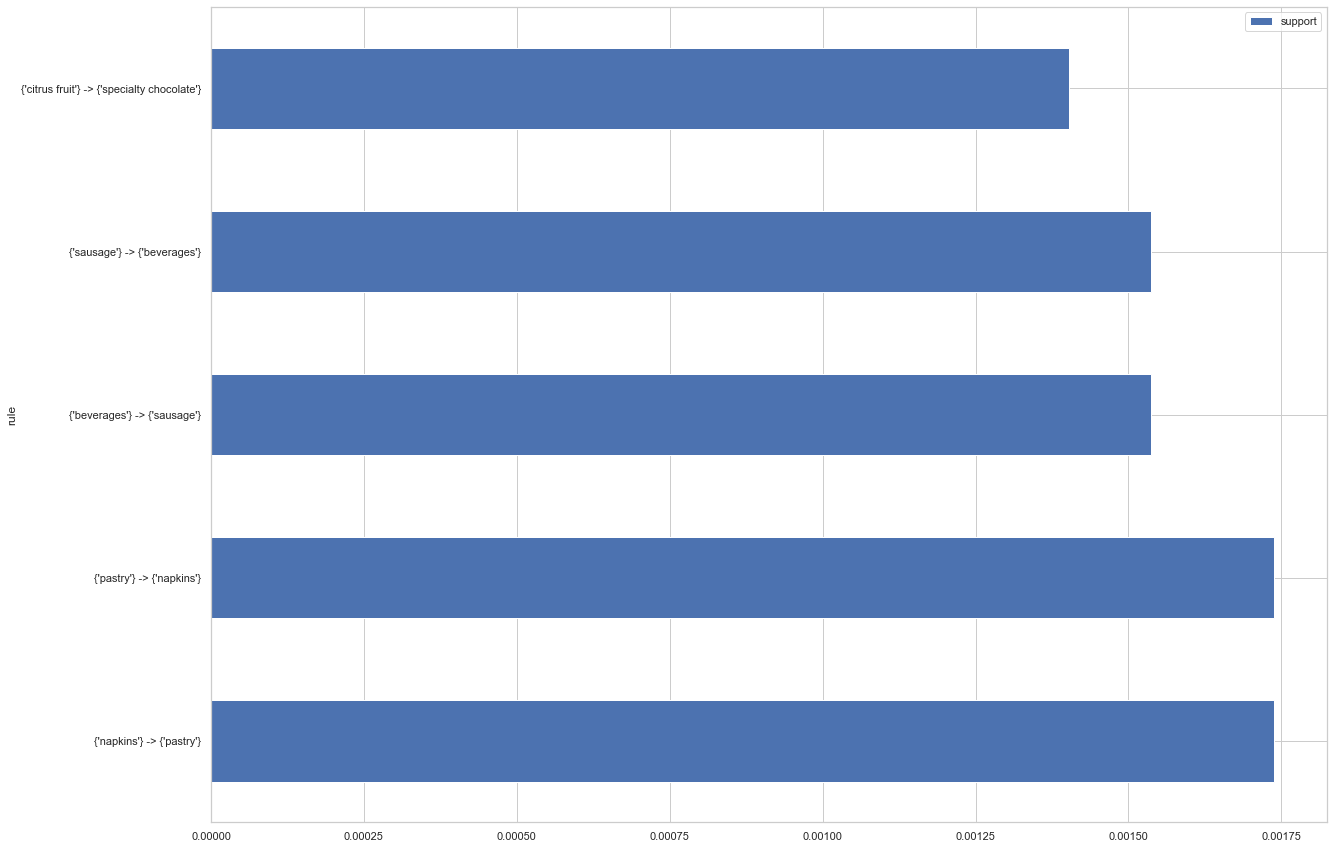

In [21]:
sorted_by_support_rules = rules.sort_values(by=['support'], ascending=False).head()
sorted_by_support_rules[['support', 'rule']].plot.barh(x='rule', y='support', figsize=(20, 15))


In [22]:
rules.sort_values(by=['support'], ascending=False).head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,rule
289,(napkins),(pastry),0.022121,0.051728,0.001738,0.078550,1.518529,0.000593,1.029109,{'napkins'} -> {'pastry'}
288,(pastry),(napkins),0.051728,0.022121,0.001738,0.033592,1.518529,0.000593,1.011869,{'pastry'} -> {'napkins'}
329,(beverages),(sausage),0.016574,0.060349,0.001537,0.092742,1.536764,0.000537,1.035704,{'beverages'} -> {'sausage'}
328,(sausage),(beverages),0.060349,0.016574,0.001537,0.025471,1.536764,0.000537,1.009129,{'sausage'} -> {'beverages'}
19,(citrus fruit),(specialty chocolate),0.053131,0.015973,0.001403,0.026415,1.653762,0.000555,1.010726,{'citrus fruit'} -> {'specialty chocolate'}


In [23]:
rules.sort_values(by=['lift'], ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,rule
688,(soups),(seasonal products),0.003208,0.007084,0.000334,0.104167,14.704206,0.000311,1.108371,{'soups'} -> {'seasonal products'}
689,(seasonal products),(soups),0.007084,0.003208,0.000334,0.047170,14.704206,0.000311,1.046138,{'seasonal products'} -> {'soups'}
296,(oil),(cookware),0.014903,0.001136,0.000200,0.013453,11.840939,0.000184,1.012485,{'oil'} -> {'cookware'}
297,(cookware),(oil),0.001136,0.014903,0.000200,0.176471,11.840939,0.000184,1.196189,{'cookware'} -> {'oil'}
115,(roll products ),(rice),0.005480,0.003275,0.000200,0.036585,11.171976,0.000183,1.034576,{'roll products '} -> {'rice'}


In [24]:
rules.sort_values(by=['leverage'], ascending=False).head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,rule
288,(pastry),(napkins),0.051728,0.022121,0.001738,0.033592,1.518529,0.000593,1.011869,{'pastry'} -> {'napkins'}
289,(napkins),(pastry),0.022121,0.051728,0.001738,0.078550,1.518529,0.000593,1.029109,{'napkins'} -> {'pastry'}
18,(specialty chocolate),(citrus fruit),0.015973,0.053131,0.001403,0.087866,1.653762,0.000555,1.038081,{'specialty chocolate'} -> {'citrus fruit'}
19,(citrus fruit),(specialty chocolate),0.053131,0.015973,0.001403,0.026415,1.653762,0.000555,1.010726,{'citrus fruit'} -> {'specialty chocolate'}
328,(sausage),(beverages),0.060349,0.016574,0.001537,0.025471,1.536764,0.000537,1.009129,{'sausage'} -> {'beverages'}


In [25]:
rules.sort_values(by=['conviction'], ascending=False).head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,rule
629,(cream),(newspapers),0.000802,0.038896,0.000200,0.250000,6.427405,0.000169,1.281472,{'cream'} -> {'newspapers'}
710,(brandy),(whole milk),0.002540,0.157923,0.000869,0.342105,2.166281,0.000468,1.279957,{'brandy'} -> {'whole milk'}
767,(specialty vegetables),(yogurt),0.000735,0.085879,0.000200,0.272727,3.175734,0.000137,1.256917,{'specialty vegetables'} -> {'yogurt'}
631,(cream),(sausage),0.000802,0.060349,0.000200,0.250000,4.142580,0.000152,1.252868,{'cream'} -> {'sausage'}
739,(honey),(sausage),0.000869,0.060349,0.000200,0.230769,3.823920,0.000148,1.221546,{'honey'} -> {'sausage'}


In [26]:
scatter_fig = px.scatter_3d(rules.sort_values(by=['confidence'], ascending=False)[:10], x='support', y='confidence', z='lift', color='rule')
scatter_fig.show()

In [27]:
frequent_itemsets.head()

,support,itemsets
0,0.157923,(whole milk)
1,0.085879,(yogurt)
2,0.060349,(sausage)
3,0.009490,(semi-finished bread)
4,0.051728,(pastry)


In [28]:
x = df.copy()
x.head()

,uid,date,items
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [29]:
top_20_purchased_items = transactions.sum(axis=0).sort_values(ascending=False)[:20]
top_20_purchased_items

whole milk            2363
other vegetables      1827
rolls/buns            1646
soda                  1453
yogurt                1285
root vegetables       1041
tropical fruit        1014
bottled water          908
sausage                903
citrus fruit           795
pastry                 774
pip fruit              734
shopping bags          712
canned beer            702
bottled beer           678
whipped/sour cream     654
newspapers             582
frankfurter            565
brown bread            563
pork                   555
dtype: int64

In [30]:
cmap = matplotlib.cm.Reds
mini = min(top_20_purchased_items)
maxi = max(top_20_purchased_items)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in top_20_purchased_items]
colors

[(0.403921568627451, 0.0, 0.05098039215686274, 1.0),
 (0.8459054209919262, 0.14256055363321812, 0.13448673587081897, 1.0),
 (0.9451903114186851, 0.26245290272971933, 0.19238754325259516, 1.0),
 (0.9843752402921953, 0.4181468665897732, 0.2926566705113418, 1.0),
 (0.9873279507881584, 0.5362552864282968, 0.41076509034986547, 1.0),
 (0.9882352941176471, 0.7118954248366013, 0.606797385620915, 1.0),
 (0.9882352941176471, 0.732072279892349, 0.6299269511726259, 1.0),
 (0.9918646674356018, 0.800476739715494, 0.7202921953094964, 1.0),
 (0.9918646674356018, 0.800476739715494, 0.7202921953094964, 1.0),
 (0.9958016147635524, 0.8733102652825836, 0.8167474048442906, 1.0),
 (0.9961860822760477, 0.8806920415224914, 0.8267589388696654, 1.0),
 (0.9969242599000384, 0.8961937716262975, 0.8489042675893886, 1.0),
 (0.9972933487120338, 0.9039446366782007, 0.8599769319492503, 1.0),
 (0.9975394079200308, 0.9091118800461361, 0.867358708189158, 1.0),
 (0.9979084967320262, 0.9168627450980392, 0.8784313725490196, 1

<AxesSubplot:>

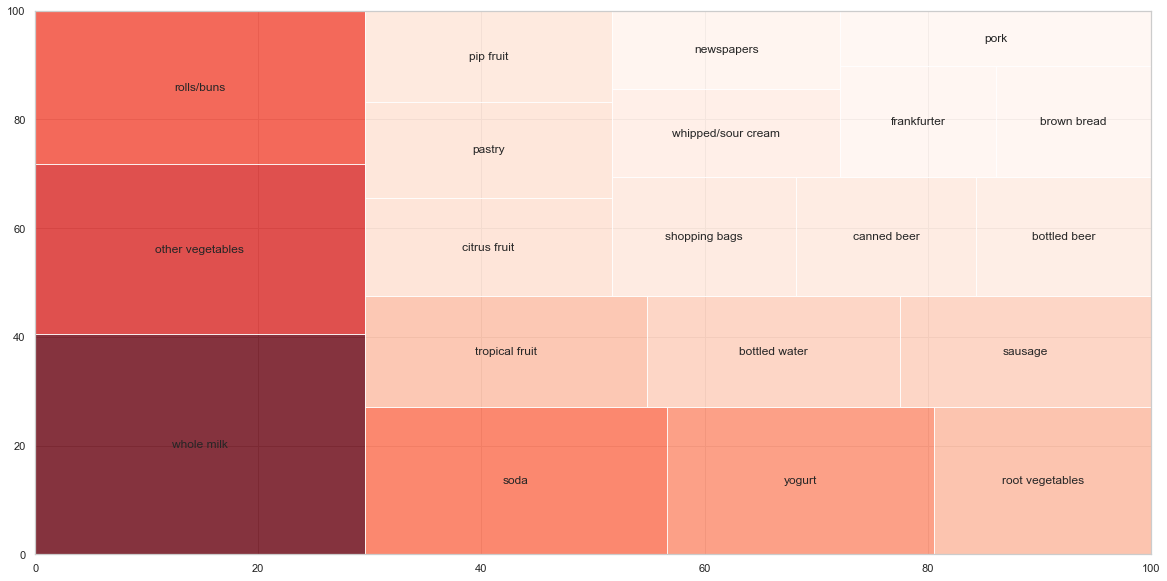

In [31]:
plt.figure(figsize=(20, 10))
squarify.plot(sizes=top_20_purchased_items.values, label=top_20_purchased_items.index, alpha=0.8, color=colors)



In [ ]:
df.isnull().values.any()

In [ ]:
df1 = df.set_axis(labels=['id', 'date', 'item'], axis=1)


In [ ]:
df1.head()

In [ ]:
df1['date'] = pd.to_datetime(df1['date'])
df1['item'] = df1['item'].astype(str)
df1['id'] = df1['id'].astype(str)

In [ ]:
df1['year_month'] = pd.to_datetime(df1['date'].dt.strftime('%Y-%m'))
df1.head()

In [ ]:
items = df1['item'].nunique()
items

In [ ]:
customers = df1['id'].nunique()
customers

In [ ]:
max_date = df1['date'].max()
min_date = df1['date'].min()
max_date

In [ ]:
df1_sales = df1['year_month'].value_counts().rename_axis('year_month').reset_index(name='sales')

df1_sales.head()

In [ ]:
df1_sales_year = df1_sales
pd.DatetimeIndex(df1_sales_year['year_month']).year